# Multiple Linear Regression
## Bike Sharing Assignment

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

Essentially, the company wants —


- To identify the variables affecting demand for shared bikes.

- To create a linear model that quantitatively the bike demands.

- To know the accuracy of the model, i.e. how well these variables can predict bike demand.


## Step 1: Reading and Understanding the Data

In [2491]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2492]:
import numpy as np
import pandas as pd

In [2493]:
bikeDemand = pd.read_csv('day.csv')

In [2494]:
bikeDemand.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [2495]:
bikeDemand.shape

(730, 16)

In [2496]:
bikeDemand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# rename variables to make more sense.
- dteday to date
- yr to year
- mnth to month
- weathersit to weather
- temp to temperature
- atemp to feelsliketemperature
- hum to humidity
- cnt to totaldemand

In [2497]:
bikeDemand.rename(columns={'yr':'year','dteday':'date','yr':'year','mnth':'month',
                            'weathersit':'weather','temp':'temperature','atemp':'feelsliketemperature',
                            'hum':'humidity','cnt':'totaldemand'},inplace=True)

In [2498]:
bikeDemand.describe()

,instant,season,year,month,holiday,weekday,workingday,weather,temperature,feelsliketemperature,humidity,windspeed,casual,registered,totaldemand
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the 
**understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [2499]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2500]:
bikeDemand_cont = bikeDemand[['temperature','feelsliketemperature','humidity','windspeed','totaldemand']]

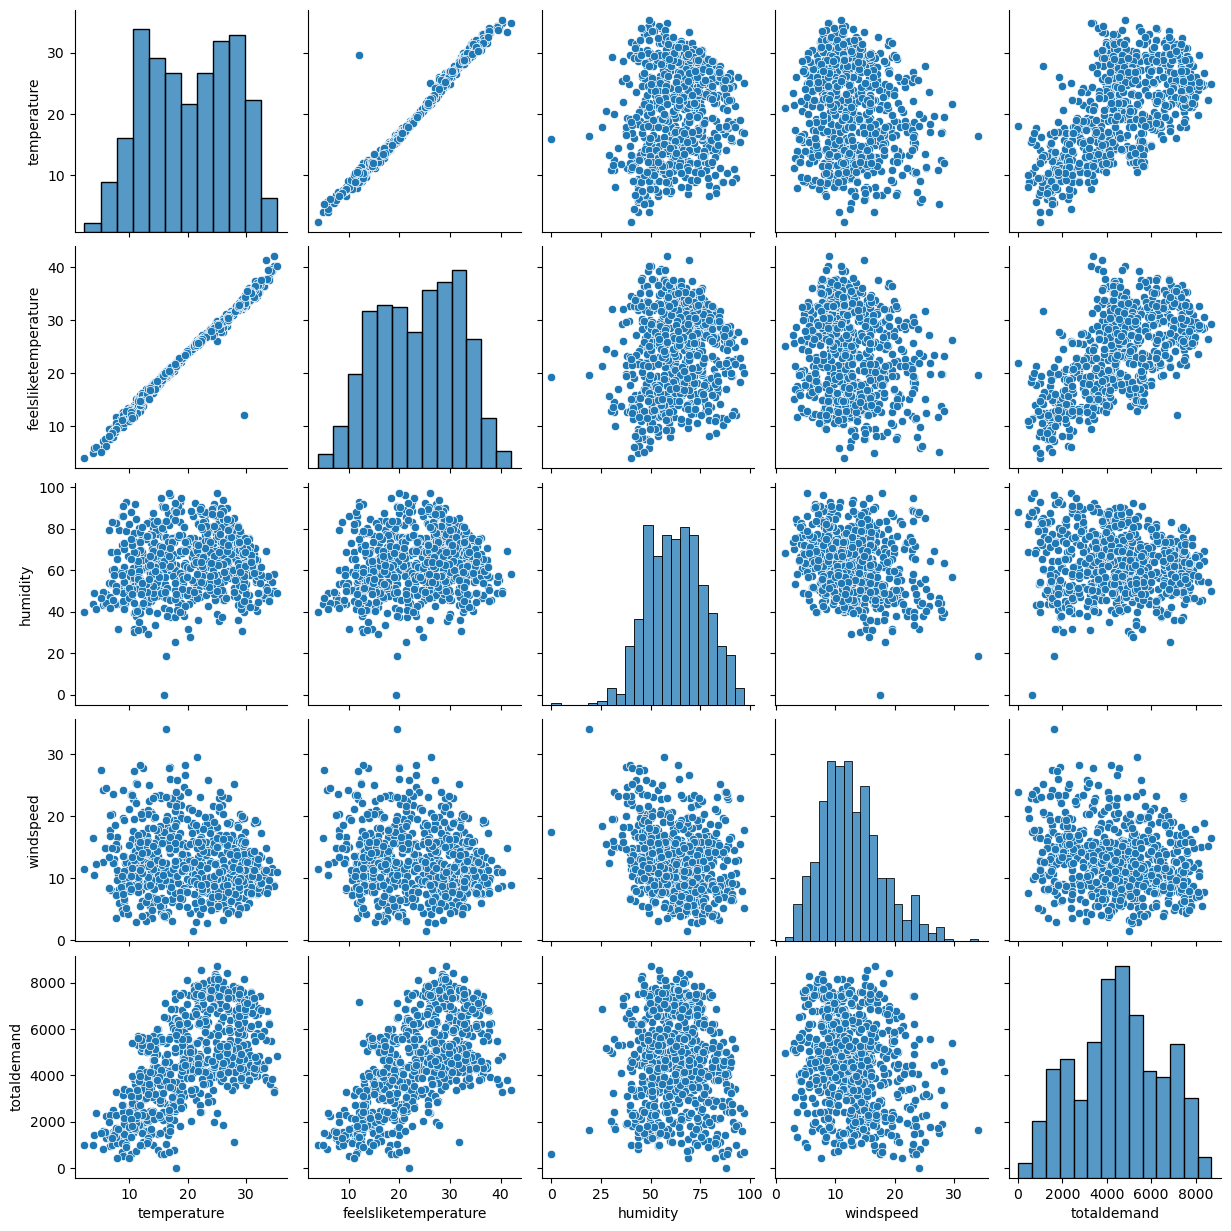

In [2501]:
sns.pairplot(bikeDemand_cont)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

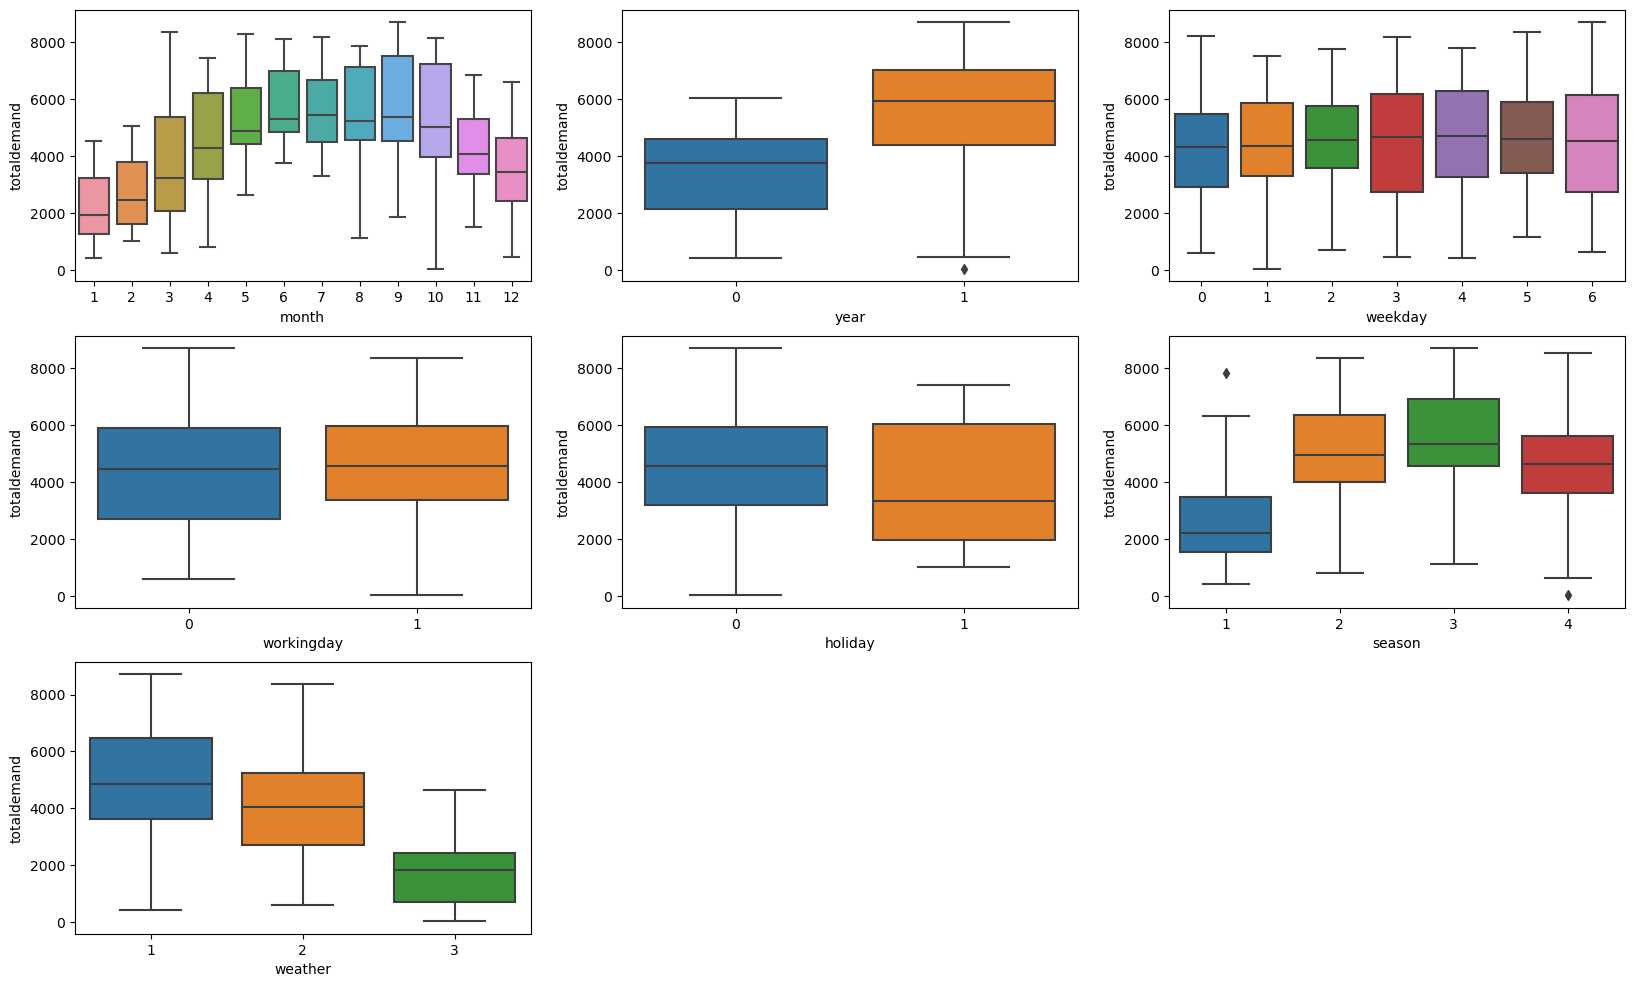

In [2502]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'month', y = 'totaldemand', data = bikeDemand)
plt.subplot(3,3,2)
sns.boxplot(x = 'year', y = 'totaldemand', data = bikeDemand)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'totaldemand', data = bikeDemand)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'totaldemand', data = bikeDemand)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'totaldemand', data = bikeDemand)
plt.subplot(3,3,6)
sns.boxplot(x = 'season', y = 'totaldemand', data = bikeDemand)
plt.subplot(3,3,7)
sns.boxplot(x = 'weather', y='totaldemand', data=bikeDemand)
plt.show()

In [2503]:
# There is not much difference in the mean of the weekday data.
# Also it is duplicate data and it can be referred from workingday
# Drop the column then
bikeDemand.drop(['weekday'],axis=1,inplace=True)

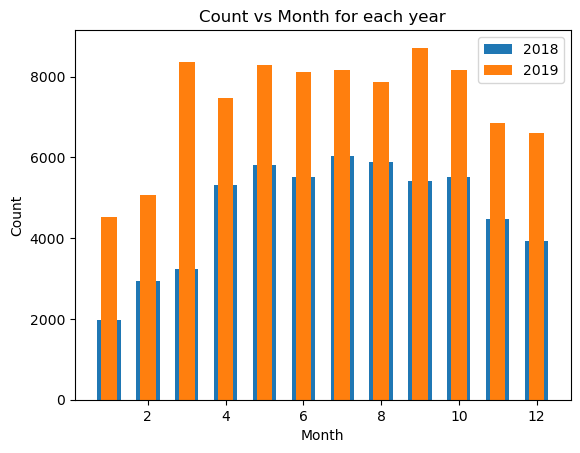

In [2504]:

plt.bar(bikeDemand['month'][bikeDemand['year'] == 0], bikeDemand['totaldemand'][bikeDemand['year'] == 0], 0.6, label='2018')

# Filter data for 2019 (year=1)

plt.bar(bikeDemand['month'][bikeDemand['year'] == 1], bikeDemand['totaldemand'][bikeDemand['year'] == 1], 0.4,label='2019')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count vs Month for each year')
plt.legend()

# Show the plot
plt.show()


## Step 3: Data Preparation

- There are no categorical variables in the dataframe. So, no need to create dummies for such columns.
- We can drop the first column 'instant','date' as it doesn't hold any value in the equation

In [2505]:
# Since registered + casual = totaldemand, these are not features. so deleting them from the set
bikeDemand.drop(['registered','casual'],axis=1,inplace=True)

In [2506]:
bikeDemand.drop(['instant','date'],axis=1,inplace=True)


- You can see that your dataset has weathersit
-   1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [2507]:
# Defining the map function
binary_map = {1: 'ClearWeather', 2 : 'CloudyMistyWeather', 3 : 'LightSnowyRainyWeather', 4: 'HeavyRainySnowyWeather'}

# Applying the function to the housing list
bikeDemand['weather'] = bikeDemand['weather'].map(binary_map)

- You can see that your dataset has month
-   1: 'January', 2 : 'February', 3 : 'March', 4: 'April',
                5: 'May', 6: 'June', 7: 'July', 8 : 'August', 
                9 : 'September' , 10: 'October', 11: 'November', 12 : 'December'
- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [2508]:
# Defining the map function
binary_map = {1: 'January', 2 : 'February', 3 : 'March', 4: 'April',
                5: 'May', 6: 'June', 7: 'July', 8 : 'August', 
                9 : 'September' , 10: 'October', 11: 'November', 12 : 'December'}

# Applying the function to the housing list
bikeDemand['month'] = bikeDemand['month'].map(binary_map)

In [2509]:
bikeDemand['month']

0       January
1       January
2       January
3       January
4       January
         ...   
725    December
726    December
727    December
728    December
729    December
Name: month, Length: 730, dtype: object

- You can see that your dataset has season
-  1: 'spring', 2 : 'summer', 3 : 'fall', 4: 'winter'
- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [2510]:
# Defining the map function
binary_map = {1: 'spring', 2 : 'summer', 3 : 'fall', 4: 'winter'}

# Applying the function to the housing list
bikeDemand['season'] = bikeDemand['season'].map(binary_map)

In [2511]:
bikeDemand['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [2512]:
bikeDemand[bikeDemand['season'] == 'spring']['month'].value_counts()

January     62
February    56
March       40
December    22
Name: month, dtype: int64

### Dummy Variables

In [2513]:
# Get the dummy variables for the feature 'weather' and store it in a new variable - 'status'
weatherstatus = pd.get_dummies(bikeDemand['weather'])

In [2514]:
weatherstatus.head()

,ClearWeather,CloudyMistyWeather,LightSnowyRainyWeather
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


- There is no data for HeavySnowyRainyWeather. So we dont need 3 columns. 
- We can get rid of the 3rd column

In [2515]:
# Let's drop the first column from status df using 'drop_first = True'

weatherstatus = pd.get_dummies(bikeDemand['weather'], drop_first = True)

In [2516]:
# Add the results to the original bikeDemand dataframe

bikeDemand = pd.concat([bikeDemand, weatherstatus], axis = 1)

In [2517]:
# Now let's see the head of our dataframe.

bikeDemand.head()

,season,year,month,holiday,workingday,weather,temperature,feelsliketemperature,humidity,windspeed,totaldemand,CloudyMistyWeather,LightSnowyRainyWeather
0,spring,0,January,0,0,CloudyMistyWeather,14.110847,18.18125,80.5833,10.749882,985,1,0
1,spring,0,January,0,0,CloudyMistyWeather,14.902598,17.68695,69.6087,16.652113,801,1,0
2,spring,0,January,0,1,ClearWeather,8.050924,9.47025,43.7273,16.636703,1349,0,0
3,spring,0,January,0,1,ClearWeather,8.200000,10.60610,59.0435,10.739832,1562,0,0
4,spring,0,January,0,1,ClearWeather,9.305237,11.46350,43.6957,12.522300,1600,0,0


In [2518]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'seasonstatus'
seasonstatus = pd.get_dummies(bikeDemand['season'])

In [2519]:
# Let's drop the first column from status df using 'drop_first = True'

seasonstatus = pd.get_dummies(bikeDemand['season'], drop_first = True)

In [2520]:
# Add the results to the original bikeDemand dataframe

bikeDemand = pd.concat([bikeDemand, seasonstatus], axis = 1)

In [2521]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'seasonstatus'
seasonstatus = pd.get_dummies(bikeDemand['month'])

In [2522]:
# Let's drop the first column from status df using 'drop_first = True'

monthName = pd.get_dummies(bikeDemand['month'], drop_first = True)

In [2523]:
# Add the results to the original bikeDemand dataframe

bikeDemand = pd.concat([bikeDemand, monthName], axis = 1)

In [2524]:
# drop both weather and season since we have created dummies for it.

bikeDemand.drop(['weather','season','month'], axis=1, inplace=True)

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [2525]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikeDemand, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that some columns like 'mnth','yr' etc, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [2526]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [2527]:
df_train.columns

Index(['year', 'holiday', 'workingday', 'temperature', 'feelsliketemperature',
       'humidity', 'windspeed', 'totaldemand', 'CloudyMistyWeather',
       'LightSnowyRainyWeather', 'spring', 'summer', 'winter', 'August',
       'December', 'February', 'January', 'July', 'June', 'March', 'May',
       'November', 'October', 'September'],
      dtype='object')

In [2528]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['year', 'holiday', 'workingday',
       'temperature', 'feelsliketemperature', 'humidity','windspeed', 'totaldemand']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [2529]:
df_train.head()

,year,holiday,workingday,temperature,feelsliketemperature,humidity,windspeed,totaldemand,CloudyMistyWeather,LightSnowyRainyWeather,...,December,February,January,July,June,March,May,November,October,September
653,1.0,0.0,1.0,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1.0,0.0,1.0,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1.0,0.0,0.0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1.0,0.0,0.0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1.0,0.0,0.0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,0,0


In [2530]:
df_train.describe()

,year,holiday,workingday,temperature,feelsliketemperature,humidity,windspeed,totaldemand,CloudyMistyWeather,LightSnowyRainyWeather,...,December,February,January,July,June,March,May,November,October,September
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.343137,0.029412,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.475223,0.169124,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


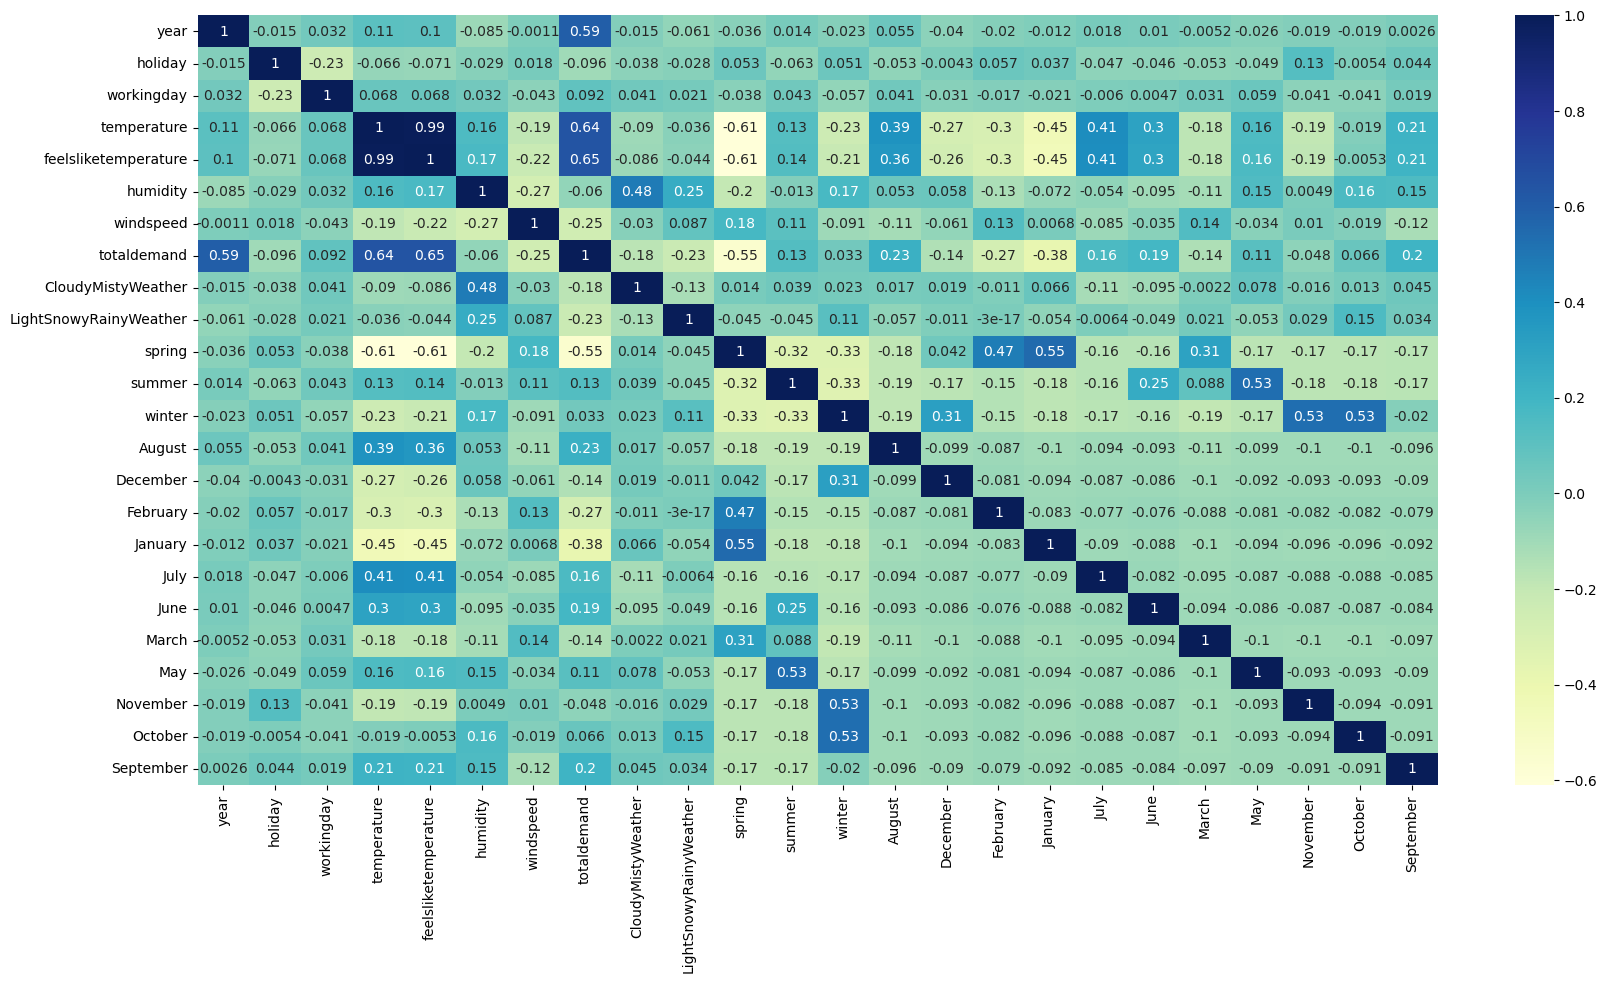

In [2531]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `feelsliketemperature` seems to the correlated to `totaldemand` the most. Let's see a pairplot for `feelsliketemperature` vs `totaldemand`.

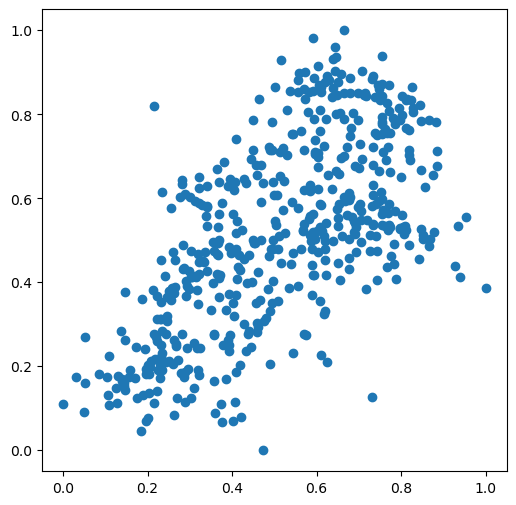

In [2532]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.feelsliketemperature, df_train.totaldemand)
plt.show()

So, we pick `feelsliketemperature` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building


In [2533]:
y_train = df_train.pop('totaldemand')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [2534]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['feelsliketemperature']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
# Check the parameters obtained

lr.params

const                   0.162924
feelsliketemperature    0.683633
dtype: float64

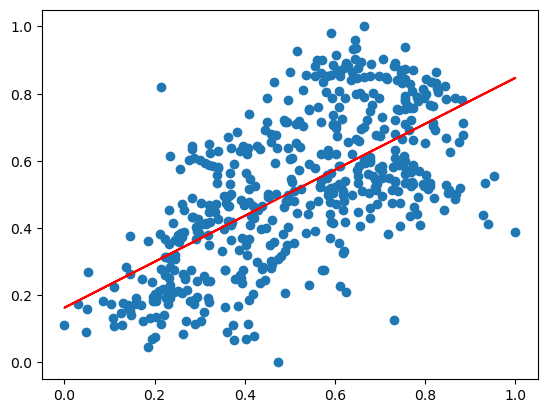

In [2535]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.163 + 0.684*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [2536]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            totaldemand   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Sun, 06 Aug 2023   Prob (F-statistic):           1.10e-61
Time:                        22:50:15   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1629 

### Adding another variable

The R-squared value obtained is `0.418`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. ``.

In [2537]:
# Assign all the feature variables to X
X_train_lm = X_train[['feelsliketemperature', 'temperature']]

In [2538]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const                   0.163383
feelsliketemperature    0.492316
temperature             0.181818
dtype: float64

In [2539]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            totaldemand   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.5
Date:                Sun, 06 Aug 2023   Prob (F-statistic):           1.95e-60
Time:                        22:50:15   Log-Likelihood:                 176.81
No. Observations:                 510   AIC:                            -347.6
Df Residuals:                     507   BIC:                            -334.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1634 

We have clearly improved the model as the value of adjusted R-squared as its value has not gone up significantly. 
There seems to high correlinearity between both the variables.

We have not improved the adjusted R-squared again. Now let's go ahead and add all the feature variables.

### Adding all the variables to the model

In [2540]:
# Check all the columns of the dataframe

bikeDemand.columns

Index(['year', 'holiday', 'workingday', 'temperature', 'feelsliketemperature',
       'humidity', 'windspeed', 'totaldemand', 'CloudyMistyWeather',
       'LightSnowyRainyWeather', 'spring', 'summer', 'winter', 'August',
       'December', 'February', 'January', 'July', 'June', 'March', 'May',
       'November', 'October', 'September'],
      dtype='object')

In [2541]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                     0.316915
year                      0.230735
holiday                  -0.076885
workingday                0.015820
temperature               0.426189
feelsliketemperature      0.029655
humidity                 -0.167010
windspeed                -0.185025
CloudyMistyWeather       -0.056898
LightSnowyRainyWeather   -0.248082
spring                   -0.045182
summer                    0.041873
winter                    0.106923
August                    0.021625
December                 -0.039558
February                 -0.032443
January                  -0.059103
July                     -0.037236
June                     -0.000474
March                     0.004411
May                       0.024734
November                 -0.038887
October                   0.009186
September                 0.087653
dtype: float64

In [2542]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:            totaldemand   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     118.1
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          2.36e-182
Time:                        22:50:15   Log-Likelihood:                 519.25
No. Observations:                 510   AIC:                            -990.5
Df Residuals:                     486   BIC:                            -888.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [2543]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2544]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temperature,432.80
4,feelsliketemperature,378.98
5,humidity,37.24
11,winter,11.69
9,spring,11.65
10,summer,6.70
21,October,6.36
20,November,6.04
12,August,5.91
6,windspeed,5.30


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `feelsliketemperature` as it has a very high p-value of `0.831` and VIF value 378. Let's go ahead and drop this variables

In [2545]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('feelsliketemperature', 1,)

In [2546]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [2547]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:            totaldemand   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     123.7
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          2.14e-183
Time:                        22:50:16   Log-Likelihood:                 519.23
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     487   BIC:                            -895.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [2548]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temperature,37.19
4,humidity,37.16
10,winter,11.66
8,spring,11.63
9,summer,6.66
20,October,6.36
19,November,6.04
11,August,5.79
14,January,5.20
15,July,5.19


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `June` has a high p-value (`0.962`) as well. Hence, this variable isn't of much use and should be dropped.

In [2549]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('June', 1)

In [2550]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [2551]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:            totaldemand   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     129.8
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          1.86e-184
Time:                        22:50:16   Log-Likelihood:                 519.23
No. Observations:                 510   AIC:                            -994.5
Df Residuals:                     488   BIC:                            -901.3
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [2552]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,humidity,37.16
3,temperature,22.76
10,winter,11.62
8,spring,11.50
9,summer,6.32
18,November,5.72
19,October,5.69
14,January,5.18
5,windspeed,5.03
12,December,4.70


### Dropping the variable and updating the model

As you might have noticed, dropping `march` has high p-value 0.843

In [2553]:
X = X.drop('March', 1)

In [2554]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [2555]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:            totaldemand   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.6
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          1.60e-185
Time:                        22:50:16   Log-Likelihood:                 519.21
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     489   BIC:                            -907.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [2556]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,humidity,35.01
3,temperature,21.66
10,winter,10.25
8,spring,7.19
9,summer,6.24
5,windspeed,4.99
18,October,4.78
17,November,4.74
11,August,3.34
12,December,3.31


### Dropping the variable and updating the model
As you might have noticed, dropping `October` has a high pvalue of 0.823

In [2557]:
X = X.drop('October', 1)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:            totaldemand   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     144.1
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          1.35e-186
Time:                        22:50:16   Log-Likelihood:                 519.18
No. Observations:                 510   AIC:                            -998.4
Df Residuals:                     490   BIC:                            -913.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [2558]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,humidity,33.37
3,temperature,21.64
8,spring,7.18
10,winter,5.85
9,summer,5.69
5,windspeed,4.90
2,workingday,3.23
11,August,3.10
15,July,2.77
14,January,2.41


### Dropping the variable and updating the model
As you might have noticed, dropping `August` as it has high insignificance with p-value 0.423

In [2559]:
X = X.drop('August', 1)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:            totaldemand   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     152.1
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          1.48e-187
Time:                        22:50:16   Log-Likelihood:                 518.85
No. Observations:                 510   AIC:                            -999.7
Df Residuals:                     491   BIC:                            -919.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [2560]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,humidity,31.75
3,temperature,18.96
8,spring,5.49
5,windspeed,4.83
10,winter,4.07
9,summer,3.36
2,workingday,3.22
13,January,2.39
6,CloudyMistyWeather,2.33
0,year,2.10


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

### Dropping the variable and updating the model
As you might have noticed, dropping `May` as it has high pvalue as 0.179

In [2561]:
X = X.drop('May', 1)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:            totaldemand   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.7
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          2.83e-188
Time:                        22:50:17   Log-Likelihood:                 517.91
No. Observations:                 510   AIC:                            -999.8
Df Residuals:                     492   BIC:                            -923.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [2562]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,humidity,31.73
3,temperature,18.90
8,spring,5.49
5,windspeed,4.74
10,winter,4.07
2,workingday,3.22
9,summer,2.84
13,January,2.39
6,CloudyMistyWeather,2.32
0,year,2.10


### Dropping the variable and updating the model
As you might have noticed, dropping `February` as it has high p-value of 0.090

In [2563]:
X = X.drop('February', 1)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:            totaldemand   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          8.97e-189
Time:                        22:50:17   Log-Likelihood:                 516.41
No. Observations:                 510   AIC:                            -998.8
Df Residuals:                     493   BIC:                            -926.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [2564]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,humidity,31.12
3,temperature,18.31
5,windspeed,4.72
8,spring,4.44
10,winter,4.07
2,workingday,3.21
9,summer,2.83
6,CloudyMistyWeather,2.32
0,year,2.09
14,November,1.84


### Dropping the variable and updating the model
As you might have noticed, dropping `workingday` as it has high p-value of 0.071

In [2565]:
X = X.drop('workingday', 1)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:            totaldemand   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          3.34e-189
Time:                        22:50:17   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [2566]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,30.94
2,temperature,17.80
4,windspeed,4.72
7,spring,4.37
9,winter,4.06
8,summer,2.81
5,CloudyMistyWeather,2.32
0,year,2.09
13,November,1.83
11,January,1.75


### Dropping the variable and updating the model
As you might have noticed, dropping `December` as it has high p-value of 0.034

In [2567]:
X = X.drop('December', 1)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:            totaldemand   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          2.25e-189
Time:                        22:50:17   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [2568]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,29.12
2,temperature,16.80
4,windspeed,4.71
7,spring,4.37
9,winter,3.78
8,summer,2.79
5,CloudyMistyWeather,2.29
0,year,2.09
10,January,1.67
11,July,1.59


### Dropping the variable and updating the model
As you might have noticed, dropping `November` as it has high p-value of 0.144

In [2569]:
X = X.drop('November', 1)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:            totaldemand   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          4.45e-190
Time:                        22:50:17   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [2570]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,29.05
2,temperature,16.70
4,windspeed,4.66
7,spring,4.34
9,winter,3.38
8,summer,2.78
5,CloudyMistyWeather,2.28
0,year,2.09
10,January,1.67
11,July,1.59


### Dropping the variable and updating the model
As you might have noticed, dropping `January` as it has high p-value of 0.061

In [2571]:
X = X.drop('January', 1)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:            totaldemand   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          1.69e-190
Time:                        22:50:17   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [2572]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,28.06
2,temperature,16.02
4,windspeed,4.65
7,spring,4.01
9,winter,3.35
8,summer,2.78
5,CloudyMistyWeather,2.28
0,year,2.08
10,July,1.58
11,September,1.38


### Dropping the variable and updating the model
As you might have noticed, dropping `spring` as it has high p-value of 0.007

In [2573]:
X = X.drop('spring', 1)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm).fit()
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:            totaldemand   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          3.89e-190
Time:                        22:50:17   Log-Likelihood:                 505.78
No. Observations:                 510   AIC:                            -987.6
Df Residuals:                     498   BIC:                            -936.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [2574]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,14.55
2,temperature,10.20
4,windspeed,3.56
5,CloudyMistyWeather,2.11
0,year,2.02
7,summer,1.76
8,winter,1.71
9,July,1.55
10,September,1.29
6,LightSnowyRainyWeather,1.16


### Dropping the variable and updating the model
As you might have noticed, dropping `humidity` as it has high VIF of 14.55

In [2575]:
X = X.drop('humidity', 1)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_lm).fit()
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:            totaldemand   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.0
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          2.09e-186
Time:                        22:50:17   Log-Likelihood:                 494.09
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [2576]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temperature,5.06
3,windspeed,3.09
0,year,2.01
6,summer,1.75
8,July,1.52
4,CloudyMistyWeather,1.49
7,winter,1.46
9,September,1.29
5,LightSnowyRainyWeather,1.08
1,holiday,1.04


### Dropping the variable and updating the model
As you might have noticed, dropping `July` as it has high p-value of 0.028

In [2577]:
X = X.drop('July', 1)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_lm).fit()
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:            totaldemand   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          1.37e-186
Time:                        22:50:17   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [2578]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temperature,3.68
3,windspeed,3.05
0,year,2.00
6,summer,1.56
4,CloudyMistyWeather,1.48
7,winter,1.38
8,September,1.20
5,LightSnowyRainyWeather,1.08
1,holiday,1.03


In [2579]:
X.columns

Index(['year', 'holiday', 'temperature', 'windspeed', 'CloudyMistyWeather',
       'LightSnowyRainyWeather', 'summer', 'winter', 'September'],
      dtype='object')

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [2580]:
y_train_bikedemand = lr_15.predict(X_train_lm)

Text(0.5, 0, 'Errors')

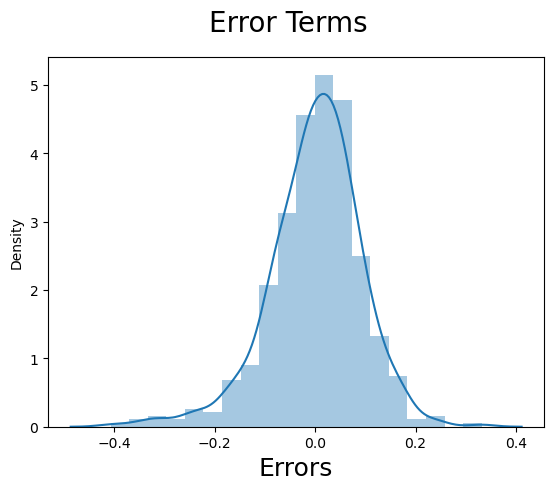

In [2581]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_bikedemand), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [2582]:
num_vars = ['year', 'holiday', 'workingday',
       'temperature', 'feelsliketemperature', 'humidity','windspeed', 'totaldemand']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [2583]:
df_test.describe()

,year,holiday,workingday,temperature,feelsliketemperature,humidity,windspeed,totaldemand,CloudyMistyWeather,LightSnowyRainyWeather,...,December,February,January,July,June,March,May,November,October,September
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.319635,0.027397,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.467403,0.163612,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [2584]:
y_test = df_test.pop('totaldemand')
X_test = df_test

In [2585]:
# Adding constant variable to test dataframe
X_test_m15 = sm.add_constant(X_test)

In [2586]:
# Creating X_test_m15 dataframe by dropping variables from X_test_m4

X_test_m15 = X_test_m15.drop(['feelsliketemperature','June','March',
'October','August','May','February',
'workingday','December','November',
'January','spring','humidity','July'], axis = 1)

In [2587]:
# Making predictions using the fourth model

y_pred_m15 = lr_15.predict(X_test_m15)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

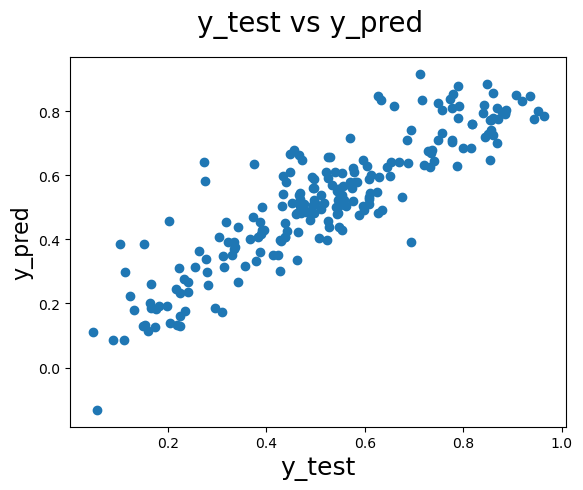

In [2588]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m15)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      


We can see that the equation of our best fitted line is:

$ totaldemand = 0.1264 + 0.23 \times year - 0.1 \times holiday + 0.55 \times temperature - 0.15 \times windspeed -0.08 \times CloudyMistyWeather - 0.28 \times LightSnowyRainyWeather + 0.09 \times summer + 0.13 \times winter + 0.1 \times September $




In [2589]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m15)

0.7938290016640651

#### Model Selection using RFE (Bike Demand Case Study)
- Importing and Understanding Data

In [2590]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2591]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm,n_features_to_select=10)
#rfe = RFE(lm)             
# running RFE
rfe = rfe.fit(X_train, y_train)

In [2592]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 11),
 ('temperature', True, 1),
 ('feelsliketemperature', False, 9),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('CloudyMistyWeather', False, 2),
 ('LightSnowyRainyWeather', True, 1),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1),
 ('August', False, 10),
 ('December', False, 6),
 ('February', False, 7),
 ('January', False, 4),
 ('July', True, 1),
 ('June', False, 14),
 ('March', False, 13),
 ('May', False, 8),
 ('November', False, 5),
 ('October', False, 12),
 ('September', True, 1)]

In [2593]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temperature', 'humidity', 'windspeed',
       'LightSnowyRainyWeather', 'spring', 'winter', 'July', 'September'],
      dtype='object')

In [2594]:
X_train.columns[~rfe.support_]

Index(['workingday', 'feelsliketemperature', 'CloudyMistyWeather', 'summer',
       'August', 'December', 'February', 'January', 'June', 'March', 'May',
       'November', 'October'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [2595]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [2596]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [2597]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [2598]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            totaldemand   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          1.53e-184
Time:                        22:50:18   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [2599]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,56.13
3,temperature,2.87
7,spring,2.53
8,winter,1.75
9,July,1.29
4,humidity,1.26
5,windspeed,1.15
6,LightSnowyRainyWeather,1.11
10,September,1.11
1,year,1.03


In [2600]:
# const has a high VIF hence dropping it
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [2601]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:            totaldemand   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          1.53e-184
Time:                        22:50:18   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [2602]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,15.18
2,temperature,13.09
4,windspeed,4.02
6,spring,2.40
0,year,2.06
7,winter,1.98
8,July,1.40
9,September,1.20
5,LightSnowyRainyWeather,1.11
1,holiday,1.04


In [2603]:
# dropping humidity due to high VIF
X_train_new = X_train_new.drop(['humidity'], axis=1)

In [2604]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            totaldemand   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          5.33e-171
Time:                        22:50:18   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [2605]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temperature,4.40
3,windspeed,3.98
0,year,2.06
5,spring,1.61
6,winter,1.37
7,July,1.34
8,September,1.20
4,LightSnowyRainyWeather,1.06
1,holiday,1.04


#### Residual Analysis of the train data
- So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.



In [2606]:
#X_train_lm.values.reshape(11,1)

y_train_bikedemand = lm.predict(X_train_lm)


In [2607]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

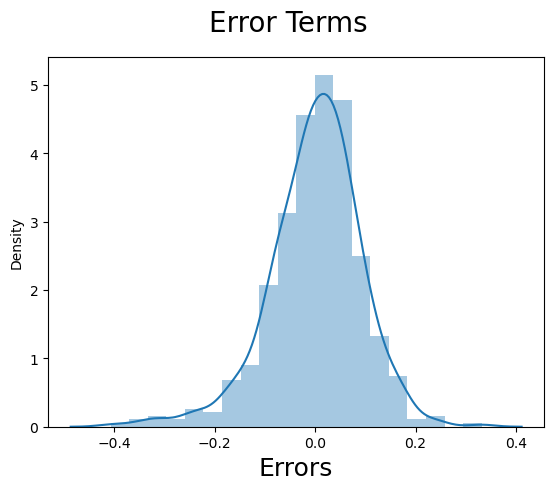

In [2608]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [2609]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [2610]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

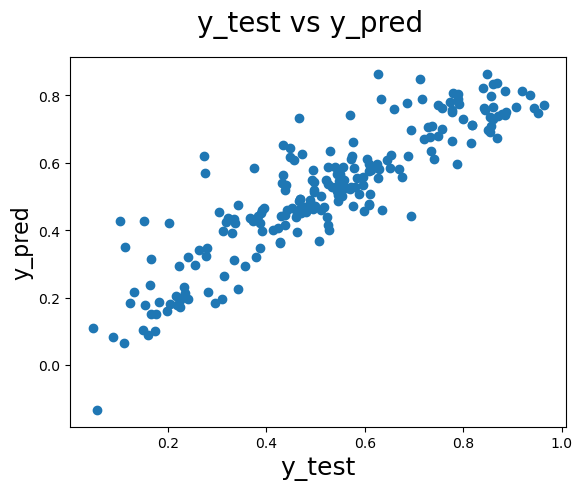

In [2611]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [2612]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7888115946045294